In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.optimize import curve_fit

In [4]:
read_data = pd.read_excel("sodium_batteries.xlsx", skiprows=1)

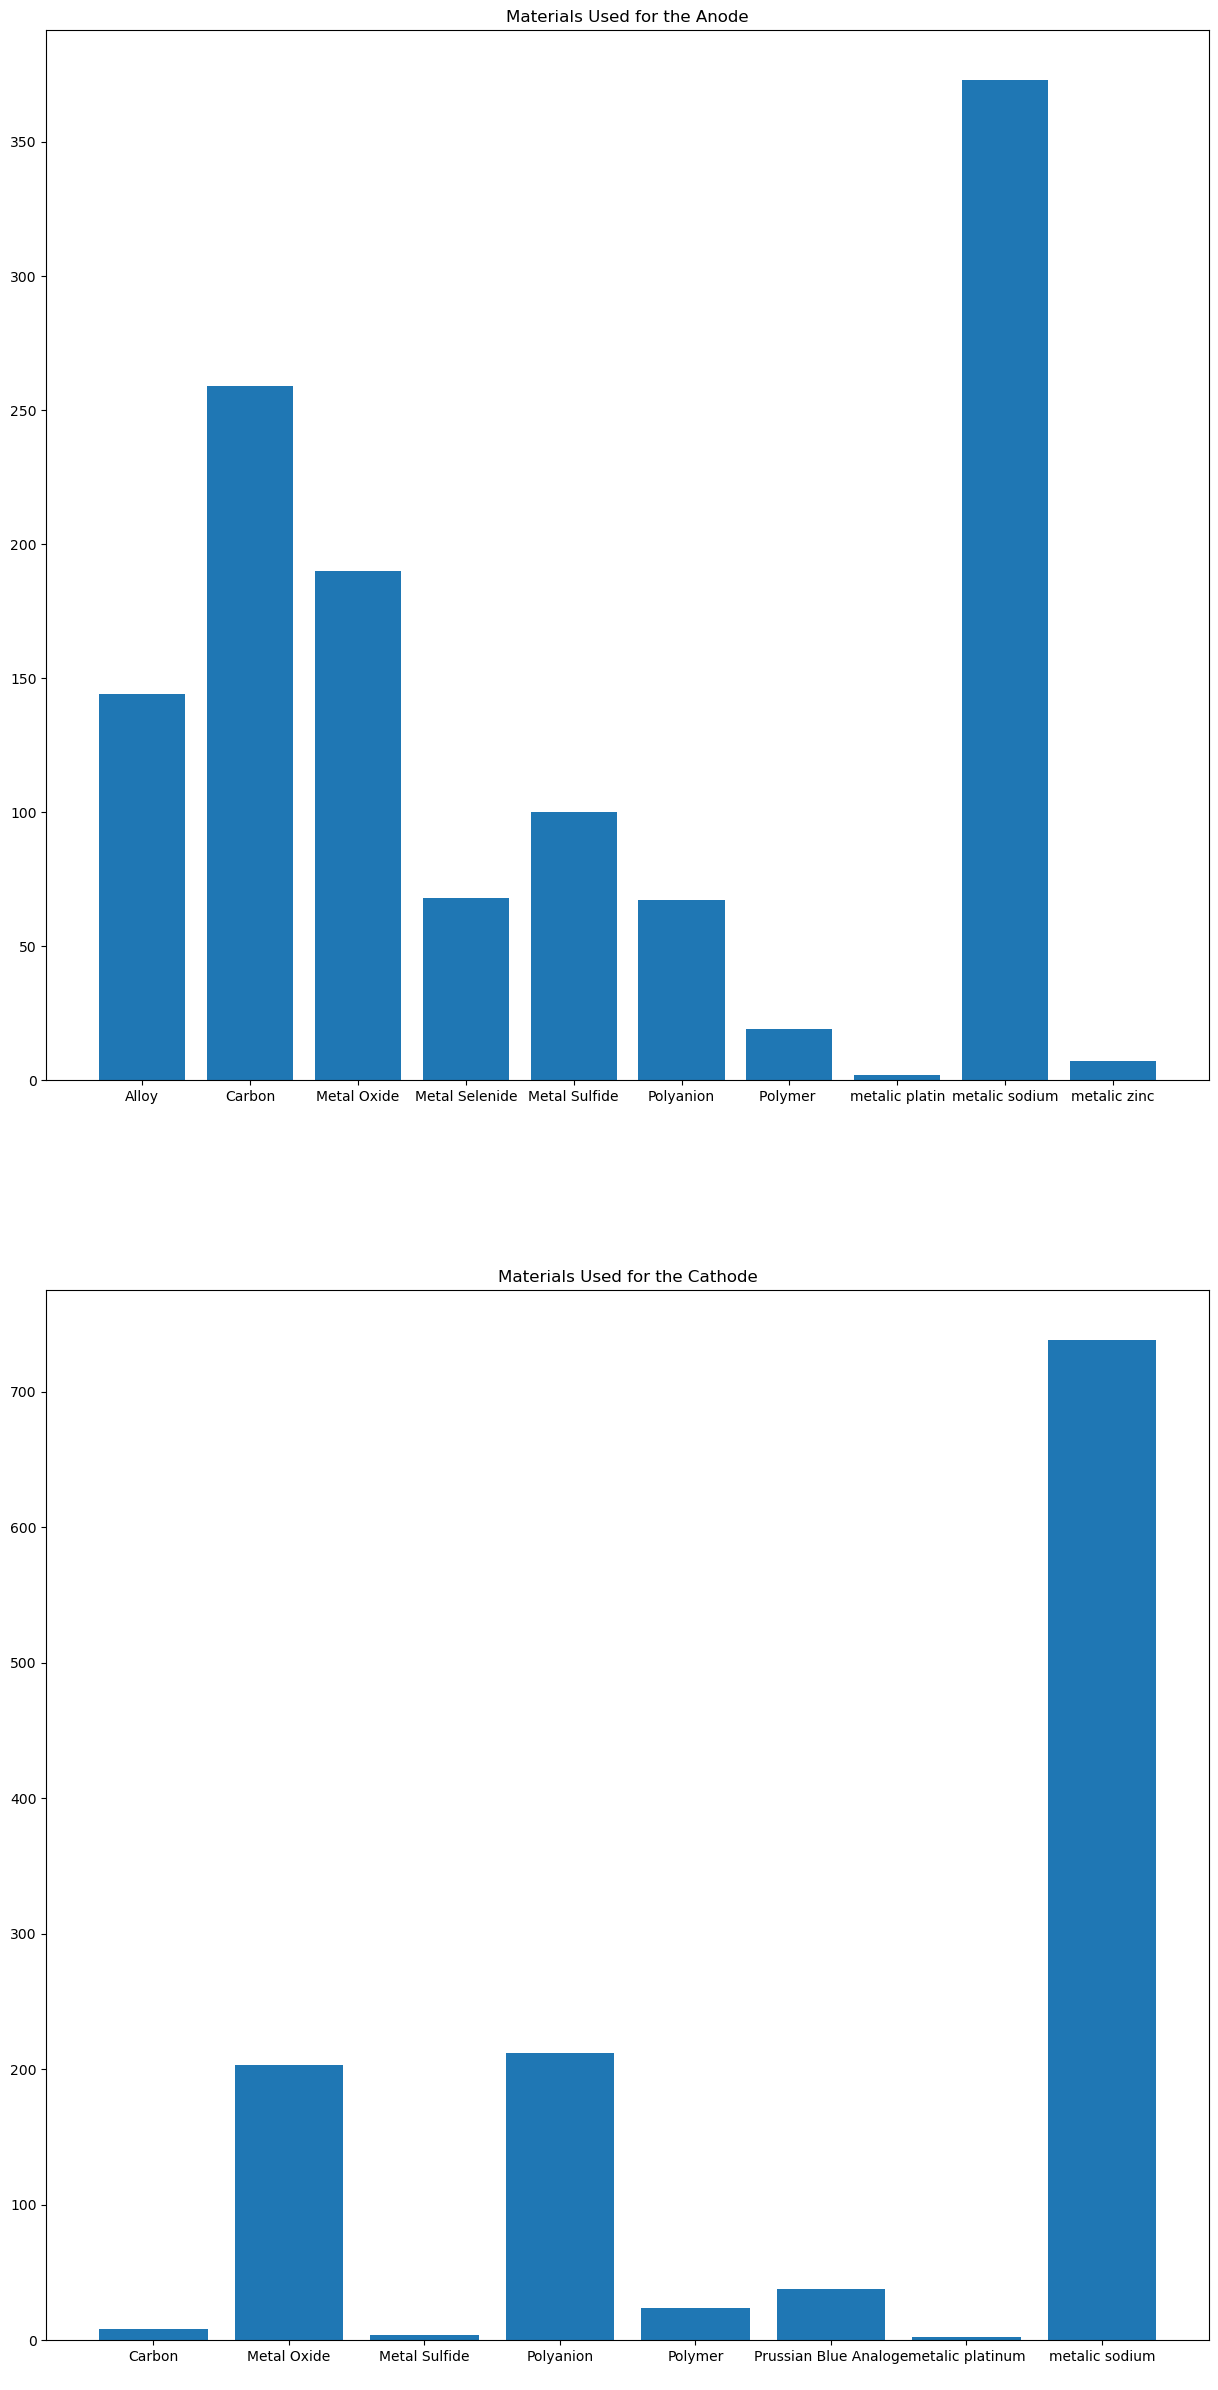

In [27]:
anode_group = read_data["Anode.Group"]
cathode_group = read_data["Cathode.Group"]
cathode_group_count = read_data.groupby("Cathode.Group").size()
anode_group_count = read_data.groupby("Anode.Group").size()

counts_cathode = []
counts_anode = []
anode_group_labels = anode_group_count.index
cathode_group_labels = cathode_group_count.index

for individual_counts in anode_group_count:
    counts_anode.append(individual_counts)

for individual_counts in cathode_group_count:
    counts_cathode.append(individual_counts)


fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 30))


ax1.bar(anode_group_labels, counts_anode)
ax1.set_title("Materials Used for the Anode")


ax2.bar(cathode_group_labels, counts_cathode)
ax2.set_title("Materials Used for the Cathode")
plt.savefig("Anode and Ca.png")

In [50]:
electrolyte_salt = read_data["Salt"]
electrolyte_salt_count = read_data.groupby("Salt").size()
print(electrolyte_salt_count)

Salt
LiPF6                    1
Na2SO4                  24
NaCF3SO3                39
NaCIO4                 848
NaDFOB                   2
NaFSI                    6
NaNO3                    1
NaOTF                    1
NaPF6                  294
NaTFSI                  10
PFSA-Na                  2
Poly(ethyleneoxide)      1
dtype: int64


In [10]:
cathode_group = read_data["Cathode.Group"]
cathode_group_count = read_data.groupby("Cathode.Group").size()
print(cathode_group_count)

Cathode.Group
Carbon                     8
Metal Oxide\n            203
Metal Sulfide              4
Polyanion                212
Polymer                   24
Prussian Blue Analoge     38
metalic platinum           2
metalic sodium           738
dtype: int64


In [6]:
peak_discharge_capacity = read_data["peak discharge capacity. (mAh/g)"]


1229


In [66]:
retention_cycle_num = read_data["peak discharge capacity retention (%80) cycle number"]
numeric_data = pd.to_numeric(retention_cycle_num, errors='coerce')


for i in range(len(numeric_data)):
    if isinstance(retention_cycle_num[i], str) and '+' in retention_cycle_num[i]:
        numeric_data[i] = float(retention_cycle_num[i].replace('+', ''))

threshold = 10000
outliers = numeric_data[numeric_data > threshold]
# print(outliers)

peak_discharge_capacity = read_data["peak discharge capacity. (mAh/g)"]
peak_discharge_np = peak_discharge_capacity.to_numpy()
peak_discharge_np = np.delete(peak_discharge_np, outliers.index)

read_data["peak discharge capacity retention (%80) cycle number"] = numeric_data
retention_np = np.array(numeric_data)
retention_np = np.delete(retention_np, outliers.index)

read_data.to_excel('file.xlsx', index=False)


In [63]:
cathode_group = read_data["Cathode.Group"]
cathode_group_count = read_data.groupby("Cathode.Group").size()
print(cathode_group_count)

Cathode.Group
Carbon                     8
Metal Oxide\n            203
Metal Sulfide              4
Polyanion                212
Polymer                   24
Prussian Blue Analoge     38
metalic platinum           2
metalic sodium           738
dtype: int64


hot encode each entry
0- Carbon
1- Metal Oxide
2- Metal Sulfide
3- Polyanion 
4- Polymer
5 - Prussian Blue Analogue
6 - metallic platinum
7- metalic sodium


In [55]:
from sklearn.preprocessing import OneHotEncoder
print(cathode_group)

encoder = OneHotEncoder(sparse_output=False)

cathode_group_reshaped = np.array(cathode_group).reshape(-1, 1)
one_hot_encoded = encoder.fit_transform(cathode_group_reshaped)

print(one_hot_encoded[60])


0       metalic sodium
1       metalic sodium
2       metalic sodium
3       metalic sodium
4       metalic sodium
             ...      
1224    metalic sodium
1225    metalic sodium
1226    metalic sodium
1227    metalic sodium
1228    metalic sodium
Name: Cathode.Group, Length: 1229, dtype: object
[0. 0. 0. 0. 0. 0. 0. 1.]


In [57]:
salt = read_data["Salt"]
salt_count = read_data.groupby("Salt").size()
print(salt_count)

Salt
LiPF6                    1
Na2SO4                  24
NaCF3SO3                39
NaCIO4                 848
NaDFOB                   2
NaFSI                    6
NaNO3                    1
NaOTF                    1
NaPF6                  294
NaTFSI                  10
PFSA-Na                  2
Poly(ethyleneoxide)      1
dtype: int64
